## Import Library

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

## Read Data

In [4]:
data = pd.read_excel("tennis.xlsx")

#merubah data menjadi kode kategori agar bisa di proses menjadi float
df = pd.get_dummies(data, columns = ['outlook','temp','humidity','windy','play'],prefix = 'item')

X = df.iloc[:,:5].values
y = df.iloc[:,5:].values

df

,item_overcast,item_rainy,item_sunny,item_cool,item_hot,item_mild,item_high,item_normal,item_False,item_True,item_no,item_yes
0,0,0,1,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1,1,0
2,1,0,0,0,1,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,1,0,0,1
4,0,1,0,1,0,0,0,1,1,0,0,1
5,0,1,0,1,0,0,0,1,0,1,1,0
6,1,0,0,1,0,0,0,1,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0,0,1
9,0,1,0,0,0,1,0,1,1,0,0,1


## Decision Tree

In [5]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=0)

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

[Text(0.625, 0.9, 'x[3] <= 0.5\ngini = 0.49\nsamples = 13\nvalue = [[7, 6]\n[6, 7]\n[7, 6]\n[6, 7]\n[7, 6]\n[8, 5]\n[5, 8]]'),
 Text(0.4166666666666667, 0.7, 'x[4] <= 0.5\ngini = 0.463\nsamples = 10\nvalue = [[4, 6]\n[3, 7]\n[7, 3]\n[4, 6]\n[6, 4]\n[6, 4]\n[4, 6]]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.397\nsamples = 6\nvalue = [[0, 6]\n[2, 4]\n[4, 2]\n[3, 3]\n[3, 3]\n[4, 2]\n[2, 4]]'),
 Text(0.16666666666666666, 0.3, 'x[2] <= 0.5\ngini = 0.411\nsamples = 5\nvalue = [[0, 5]\n[2, 3]\n[3, 2]\n[2, 3]\n[3, 2]\n[3, 2]\n[2, 3]]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.381\nsamples = 3\nvalue = [[0, 3]\n[1, 2]\n[2, 1]\n[1, 2]\n[2, 1]\n[2, 1]\n[1, 2]]'),
 Text(0.25, 0.1, 'gini = 0.429\nsamples = 2\nvalue = [[0, 2]\n[1, 1]\n[1, 1]\n[1, 1]\n[1, 1]\n[1, 1]\n[1, 1]]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[0, 1]\n[1, 0]\n[1, 0]\n[0, 1]\n[1, 0]\n[0, 1]]'),
 Text(0.5833333333333334, 0.5, 'x[2] <= 0.5\ngini = 0.357\nsamples = 4\nvalue = [[4, 0]\n[1, 3]\n[3

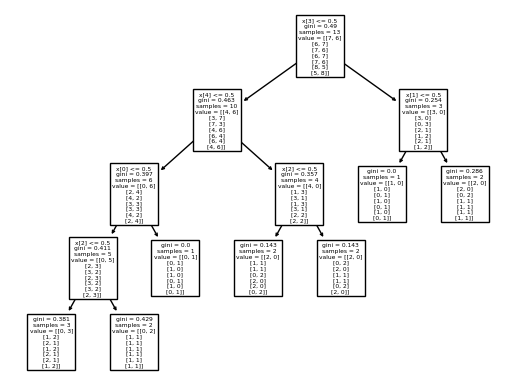

In [6]:
tree.plot_tree(model)

In [7]:
y_pred = model.predict(X_test)

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1

   micro avg       0.67      0.67      0.67         3
   macro avg       0.29      0.29      0.29         3
weighted avg       0.67      0.67      0.67         3
 samples avg       0.67      0.67      0.67         3


Confusion Matrix:
[[1]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
